In [ ]:
# !pip install huggingface_hub

In [ ]:
from transformers import pipeline
from huggingface_hub import login
from google.colab import userdata
from huggingface_hub import model_info
from huggingface_hub import list_models
from huggingface_hub import HfApi

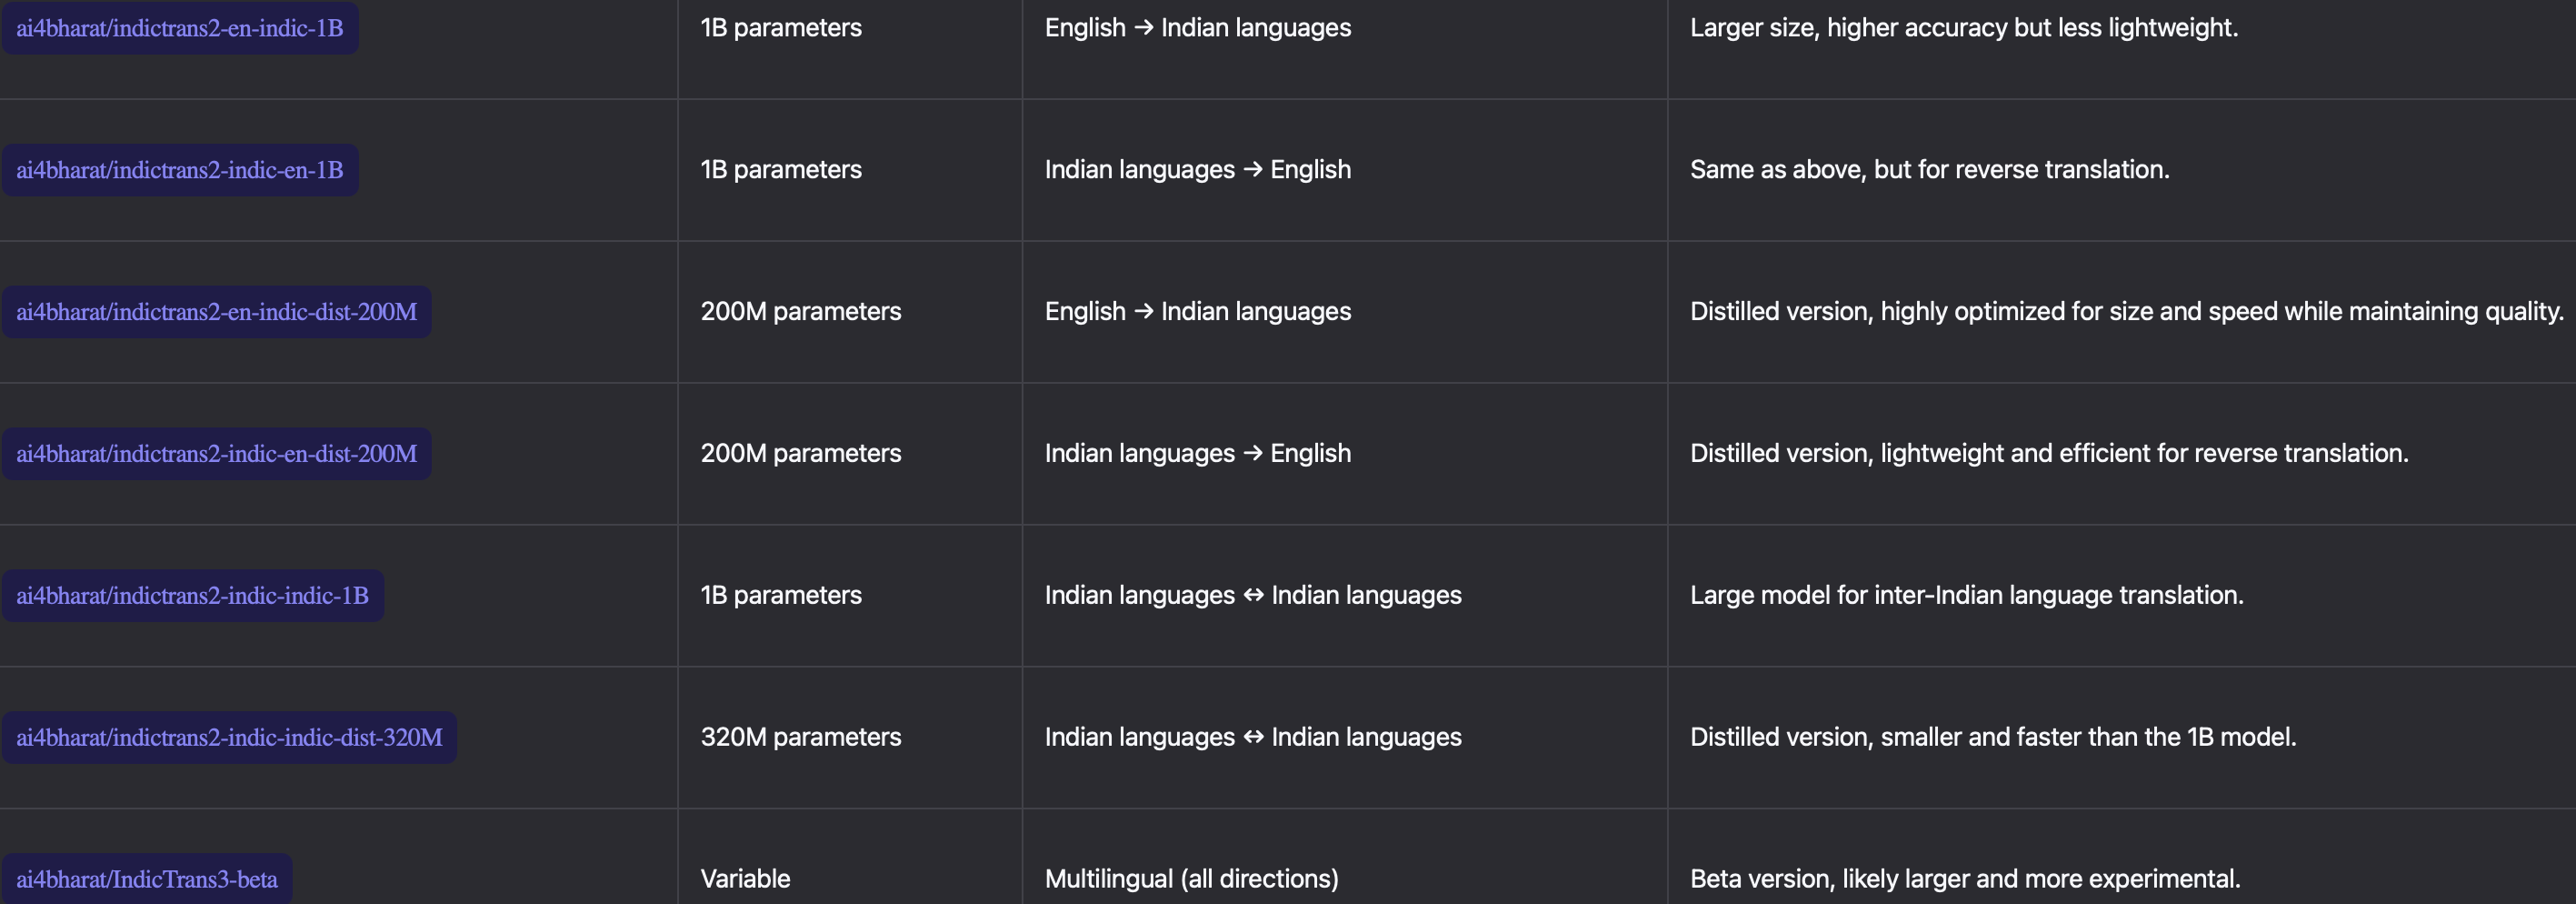

In [ ]:
model_info('ai4bharat/indictrans2-en-indic-dist-200M')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ModelInfo(id='ai4bharat/indictrans2-en-indic-dist-200M', author='ai4bharat', sha='173b94239f7c38886b2747b8d4a5db771a7e1232', created_at=datetime.datetime(2023, 9, 12, 11, 49, 16, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 5, 2, 4, 11, 50, tzinfo=datetime.timezone.utc), private=False, disabled=False, downloads=65359, downloads_all_time=None, gated=False, gguf=None, inference=None, inference_provider_mapping=None, likes=17, library_name='transformers', tags=['transformers', 'pytorch', 'safetensors', 'IndicTrans', 'text2text-generation', 'indictrans2', 'translation', 'ai4bharat', 'multilingual', 'custom_code', 'as', 'bn', 'brx', 'doi', 'en', 'gom', 'gu', 'hi', 'kn', 'ks', 'kas', 'mai', 'ml', 'mr', 'mni', 'mnb', 'ne', 'or', 'pa', 'sa', 'sat', 'sd', 'snd', 'ta', 'te', 'ur', 'dataset:flores-200', 'dataset:IN22-Gen', 'dataset:IN22-Conv', 'license:mit', 'region:us'], pipeline_tag='translation', mask_token=None, card_data={'base_model': None, 'datasets': ['flores-200',

In [ ]:
def show_trans_model_popularity(query):
  try:
    api = HfApi()
    models = api.list_models(search=query)
    model_list = list(models)
    print(f'\n Found {len(list(model_list))} for query {query} \n')

    # Step 1: Sort by downloads in descending order
    top_models = sorted(model_list, key=lambda x: x.downloads or 0, reverse=True)[:10]

    # Step 2: Sort by downloads in ascending order
    # top_models = sorted(model_list, key=lambda x: x.downloads or 0)[:10]

    # for model in model_list:
    for model in top_models:
      print(f'Model Id: {model.id}\tDownloads: {model.downloads}')


  except Exception as e:
    print(f'Error: {e}')

In [ ]:
show_trans_model_popularity('indictrans')


 Found 80 for query indictrans 

Model Id: ai4bharat/indictrans2-indic-en-1B	Downloads: 141592
Model Id: ai4bharat/indictrans2-en-indic-dist-200M	Downloads: 65359
Model Id: ai4bharat/indictrans2-en-indic-1B	Downloads: 40940
Model Id: ai4bharat/indictrans2-indic-indic-1B	Downloads: 16689
Model Id: ai4bharat/indictrans2-indic-indic-dist-320M	Downloads: 10105
Model Id: ai4bharat/indictrans2-indic-en-dist-200M	Downloads: 7049
Model Id: ai4bharat/IndicTrans3-beta	Downloads: 1133
Model Id: mradermacher/IndicTrans3-gemma-beta-i1-GGUF	Downloads: 573
Model Id: prajdabre/rotary-indictrans2-en-indic-1B	Downloads: 310
Model Id: prajdabre/rotary-indictrans2-en-indic-dist-200M	Downloads: 283


In [ ]:
# Search for AI4Bharat models
ai4bharat_models = list(models for models in list_models(author="ai4bharat") if "trans" in models.id.lower())

for model in ai4bharat_models[:100]: # Show first 10 models
  print(f"Model: {model.id}")

Model: ai4bharat/indictrans2-indic-en-1B
Model: ai4bharat/indictrans2-en-indic-1B
Model: ai4bharat/indictrans2-en-indic-dist-200M
Model: ai4bharat/indictrans2-indic-en-dist-200M
Model: ai4bharat/indictrans2-indic-indic-1B
Model: ai4bharat/indictrans2-indic-indic-dist-320M
Model: ai4bharat/IndicTrans3-beta


In [ ]:
# Specify the model ID
model_id = 'ai4bharat/indictrans2-en-indic-dist-200M'
# Fetch model information
info = model_info(model_id)
# Access various attributes of the model
print(f"Model ID: {info.modelId}")
print(f"Author: {info.author}")
print(f"Description:", info.cardData.get("description", "No description available"))

Model ID: ai4bharat/indictrans2-en-indic-dist-200M
Author: ai4bharat
Description: No description available


In [ ]:
if "en-indic" in model_id:
  print("Translation Direction: English → Indian Languages")
elif "indic-en":
  print("Translation Direction: Indian Languages → English")
elif "indic-indic":
  print("Translation Direction: Indian Languages → Indian Languages")

Translation Direction: English → Indian Languages


In [ ]:
model_info('ai4bharat/indictrans2-en-indic-dist-200M').id

'ai4bharat/indictrans2-en-indic-dist-200M'

In [ ]:
model_info('ai4bharat/indictrans2-en-indic-dist-200M').author

'ai4bharat'

In [ ]:
modelName = "ai4bharat/indictrans-v2"
operation = "translation"

In [ ]:
try:
  modelInfo = model_info(modelName)
  print(f"Model found: {modelInfo}")
except Exception as e:
  print(f"Model not found: {e}")
  print("Model not found. Please check the model name.")

Model not found: 401 Client Error. (Request ID: Root=1-68dd0ac0-226e2f2421414f0c0e94c6f4;0144ab5f-2a4c-468d-a05c-ab8f001594ca)

Repository Not Found for url: https://huggingface.co/api/models/ai4bharat/indictrans-v2.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated. For more details, see https://huggingface.co/docs/huggingface_hub/authentication
Invalid username or password.
Model not found. Please check the model name.


In [ ]:
HF_TOKEN = userdata.get('dev-token')

In [ ]:
if HF_TOKEN is None:
  print("HF_TOKEN secret not found. Please set it in Colab secrets first.")
else:
  print("HF_TOKEN secret found.")

  # Authenticate to Hugging Face Hub using the retrieved token
  login(HF_TOKEN)
  print("Authentication successful.")

  # translator = pipeline(operation, model=model_name, token=HF_TOKEN)

HF_TOKEN secret found.
Authentication successful.


In [ ]:
# Indain language aliases
INDIAN_LANG_ALIASES = {
    "english": ["english", "eng", "inglish", "angrezi", "ang"],
    "hindi": ["hindi", "hen","heen", "hindhi", "hindy", "hnd", "हिंदी"],
    "tamil": ["tamil", "tem", "tamil", "tamizh", "tam", "thamizh", "தமிழ்"],
    "bengali": ["bengali", "bangla", "bangaali", "ben","ban", "বাংলা"],
    "malayalam": ["malayalam", "malaylam", "malay","mel", "മലയാളം"],
    "kannada": ["kannada", "kanada", "kannad", "ken", "kan", "ಕನ್ನಡ"],
    "telugu": ["telugu", "telgu", "telegu", "til", "tal", "తెలుగు"],
    "gujarati": ["gujarati", "gujrati", "guj", "gaj", "ગુજરાતી"],
    "marathi": ["marathi","mer", "marati", "marthi", "मराठी"],
    "punjabi": ["punjabi", "panjabi", "punjbi", "pun", "pan", "ਪੰਜਾਬੀ"],
    "odia": ["odia", "oriya", "odisha", "ode", "ଓଡ଼ିଆ"]
}


In [ ]:
for alias, lang  in INDIAN_LANG_ALIASES.items():
  print(alias.ljust(10," "), ":", lang)

english    : ['english', 'eng', 'inglish', 'angrezi', 'ang']
hindi      : ['hindi', 'hen', 'heen', 'hindhi', 'hindy', 'hnd', 'हिंदी']
tamil      : ['tamil', 'tem', 'tamil', 'tamizh', 'tam', 'thamizh', 'தமிழ்']
bengali    : ['bengali', 'bangla', 'bangaali', 'ben', 'ban', 'বাংলা']
malayalam  : ['malayalam', 'malaylam', 'malay', 'mel', 'മലയാളം']
kannada    : ['kannada', 'kanada', 'kannad', 'ken', 'kan', 'ಕನ್ನಡ']
telugu     : ['telugu', 'telgu', 'telegu', 'til', 'tal', 'తెలుగు']
gujarati   : ['gujarati', 'gujrati', 'guj', 'gaj', 'ગુજરાતી']
marathi    : ['marathi', 'mer', 'marati', 'marthi', 'मराठी']
punjabi    : ['punjabi', 'panjabi', 'punjbi', 'pun', 'pan', 'ਪੰਜਾਬੀ']
odia       : ['odia', 'oriya', 'odisha', 'ode', 'ଓଡ଼ିଆ']


In [ ]:
for alias in INDIAN_LANG_ALIASES:
  print(alias)

english
hindi
tamil
bengali
malayalam
kannada
telugu
gujarati
marathi
punjabi
odia


In [ ]:
# !pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.0 MB/s eta 0:00:00


In [ ]:
# imports the process module from the rapidfuzz library, which will be used to perform fuzzy string matching.
from rapidfuzz import process

The output of the last cell `('english', 'eng', 'inglish', 'angrezi', 'ang') : 0.0 : 0 `shows the result of using `process.extractOne` to find the closest match for the string `'eng'` within the keys of the `INDIAN_LANG_ALIASES` dictionary.

#### Here's what each part means:
**`('english', 'eng', 'inglish', 'angrezi', 'ang'):`**
This is the tuple from the **INDIAN_LANG_ALIASES** dictionary that **rapidfuzz** found to be the best match for the input string `'eng'`.

`0.0:` This is the similarity score between **`'eng'`** and the best match. A **score of 0.0 indicates a perfect match** according to the default ratio metric used by **extractOne** when comparing a short string to a longer string or tuple. In this case, **`'eng'`** is an exact match for one of the elements in the tuple.
`0:` This is the index of the best match in the list of keys provided to extractOne. Since the keys of INDIAN_LANG_ALIASES are tuples, and the first tuple in the dictionary is `('english', 'eng', 'inglish', 'angrezi', 'ang')`, the **index is 0.**

In summary, the output tells you that the input **`'eng'`** was a perfect match **(score 0.0)** for the first tuple in your **INDIAN_LANG_ALIASES** dictionary, which corresponds to the English language aliases.

In [ ]:
prompt = "odi"
match, score, index = process.extractOne(prompt.lower(), INDIAN_LANG_ALIASES.keys())
print(f" {match} \n Score: {score} \n Index: {index}")

 odia 
 Score: 85.71428571428572 
 Index: 10


In [ ]:
def normalize_language(user_input):
    all_aliases = {alias: lang for lang, aliases in INDIAN_LANG_ALIASES.items() for alias in aliases}
    match, score, index = process.extractOne(user_input.lower(), all_aliases.keys())

    print(f"Score: {score}")
    return all_aliases[match] if score > 80 else None

In [ ]:
normalize_language('eng')

Score: 100.0


'english'

In [27]:
summary = pipeline("summarization")
text = summary("Translate this into Hindi for my grandmother", max_length=8)
text

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Your min_length=56 must be inferior than your max_length=4.
/usr/local/lib/python3.12/dist-packages/transformers/generation/utils.py:1618: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (4). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


[{'summary_text': ' Trans'}]

In [28]:
classifier=pipeline("zero-shot-classification")
sequence_to_classify = "Translate this into Hindi for my grandmother"
candidate_labels = ['translate', 'convert', 'change language', 'switch to']
classifier(sequence_to_classify, candidate_labels)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'sequence': 'Translate this into Hindi for my grandmother',
 'labels': ['change language', 'translate', 'switch to', 'convert'],
 'scores': [0.5410639047622681,
  0.17383848130702972,
  0.16509824991226196,
  0.11999934911727905]}

In [29]:
ner = pipeline("ner")
ner("Translate this into Hindi for my grandmother")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'entity': 'I-MISC',
  'score': np.float32(0.992168),
  'index': 5,
  'word': 'Hindi',
  'start': 20,
  'end': 25}]